In [2]:
# Install praw
%pip install -U praw

  Using cached praw-7.8.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached prawcore-2.4.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl.metadata (2.3 kB)
Using cached praw-7.8.1-py3-none-any.whl (189 kB)
Using cached prawcore-2.4.0-py3-none-any.whl (17 kB)
Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import praw

reddit = praw.Reddit(
    client_id='JibZxphvSqXQJrd38FNV0g',
    client_secret='7gmJmrw9XCuczg4nQqgDu_8fV94mBQ',
    user_agent="my user agent"
)


In [ ]:
import pandas as pd
import requests
import datetime
import time


# Define target subreddits and AI-related keywords
subreddits = ["Stocks", "StockMarket"]
ai_keywords = ["GPT", "LLM", "Gen AI", "ChatGPT", "Claude","Perplexity", "Nvidia","GPU","Gemini","Llama","Co-pilot"]


start_date = datetime.datetime(2024, 2, 25).timestamp()
end_date = datetime.datetime(2025, 2, 24).timestamp()

# Pushshift API URL for searching posts
# PUSHSHIFT_URL = "https://api.pushshift.io/reddit/search/submission/"


def fetch_reddit_comments():
    comment_data = []
    for subreddit in subreddits:
        try:
            subreddit_instance = reddit.subreddit(subreddit)
            for submission in subreddit_instance.new(limit=100000):  # Adjust limit as needed
                if start_date <= submission.created_utc <= end_date:
                    submission.comments.replace_more(limit=0)  # Load all top-level comments
                    for comment in submission.comments.list():
                        if start_date <= comment.created_utc <= end_date:
                            text = comment.body
                            if any(keyword.lower() in text.lower() for keyword in ai_keywords):
                                comment_data.append([ 
                                    datetime.datetime.fromtimestamp(comment.created_utc),
                                    subreddit,
                                    comment.author.name if comment.author else "Unknown",
                                    text
                                ])
           
        except Exception as e:
            print(f"Error fetching data from {subreddit}: {str(e)}")
    
    df = pd.DataFrame(comment_data, columns=["Timestamp", "Subreddit", "Username", "Comment"])
    return df


# Fetch AI-related comments
reddit_comments_df = fetch_reddit_comments()

# Save to CSV
reddit_comments_df.to_csv("reddit_ai_comments.csv", index=False)

# Display first few rows
reddit_comments_df.head()


,Timestamp,Subreddit,Username,Comment


In [32]:
import praw
import pandas as pd
import datetime
import time



# Define target subreddits and AI-related keywords
subreddits = ["stocks", "stockmarket","finance","technology"]
ai_keywords = ["GPT", "LLM", "Gen AI", "ChatGPT", "Claude","Perplexity", "Nvidia","GPU","Gemini","Llama","Co-pilot"]

# Define time filter (past year)
time_filter = "year"
num_posts = None  # Adjust as needed

# Function to fetch relevant posts and comments using PRAW
def fetch_reddit_comments():
    comment_data = []
    for subreddit in subreddits:
        try:
            subreddit_instance = reddit.subreddit(subreddit)
            for submission in subreddit_instance.search(" OR ".join(ai_keywords), time_filter=time_filter, sort="relevance", limit=num_posts):
                submission.comments.replace_more(limit=0)  # Load all top-level comments
                for comment in submission.comments.list():
                    text = comment.body
                    if any(keyword.lower() in text.lower() for keyword in ai_keywords):
                        comment_data.append([
                            datetime.datetime.fromtimestamp(comment.created_utc),
                            subreddit,
                            comment.author.name if comment.author else "Unknown",
                            text
                        ])
            time.sleep(1)  # To avoid rate limits
        except Exception as e:
            print(f"Error fetching data from {subreddit}: {e}")
    
    df = pd.DataFrame(comment_data, columns=["Timestamp", "Subreddit", "Username", "Comment"])
    return df

# Fetch AI-related comments
reddit_comments_df = fetch_reddit_comments()

# Save to CSV
reddit_comments_df.to_csv("reddit_ai_comments.csv", index=False)

# Display first few rows
reddit_comments_df.head()

Error fetching data from technology: error with request HTTPSConnectionPool(host='oauth.reddit.com', port=443): Max retries exceeded with url: /comments/1hq6nj1/?limit=2048&sort=confidence&raw_json=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D4D7C6C890>: Failed to resolve 'oauth.reddit.com' ([Errno 11001] getaddrinfo failed)"))


,Timestamp,Subreddit,Username,Comment
0,2025-01-27 15:35:35,stocks,wollywink,"""Nvidia’s decline is more than double the mark..."
1,2025-01-27 17:17:15,stocks,Zephos65,I'm a machine learning engineer.\n\nSince the ...
2,2025-01-27 15:20:44,stocks,Jsand117,Even though its most likely a giant overreacti...
3,2025-01-27 15:42:17,stocks,purplebrown_updown,The freakout is because people are worried tha...
4,2025-01-27 16:23:55,stocks,ResidentResearcher94,"Deepseek isn’t a competitor to Nvidia, it stil..."


In [39]:
# Load both CSV files
df1 = pd.read_csv("reddit_ai_comments-GoogleColab.csv")
df2 = pd.read_csv("reddit_ai_comments.csv")
df3 = pd.read_csv("reddit_ai_comments-GoogleColab-2.csv")
df4 = pd.read_csv("reddit_ai_comments-Googlecolab3.csv")

# Concatenate both DataFrames
merged_df = pd.concat([df1, df2,df3,df4])

# Drop duplicate rows based on all columns (or specify subset=['column_name'] to check specific columns)
merged_df = merged_df.drop_duplicates()

# Save the final merged CSV file
merged_df.to_csv("merged_unique.csv", index=False)

# Display the first few rows
print(merged_df.head())


             Timestamp Subreddit              Username  \
0  2025-01-27 21:35:35    stocks             wollywink   
1  2025-01-27 23:17:15    stocks              Zephos65   
2  2025-01-27 21:20:44    stocks              Jsand117   
3  2025-01-27 21:42:17    stocks    purplebrown_updown   
4  2025-01-27 22:23:55    stocks  ResidentResearcher94   

                                             Comment  
0  "Nvidia’s decline is more than double the mark...  
1  I'm a machine learning engineer.\n\nSince the ...  
2  Even though its most likely a giant overreacti...  
3  The freakout is because people are worried tha...  
4  Deepseek isn’t a competitor to Nvidia, it stil...  


In [40]:
print(len(merged_df))

54165


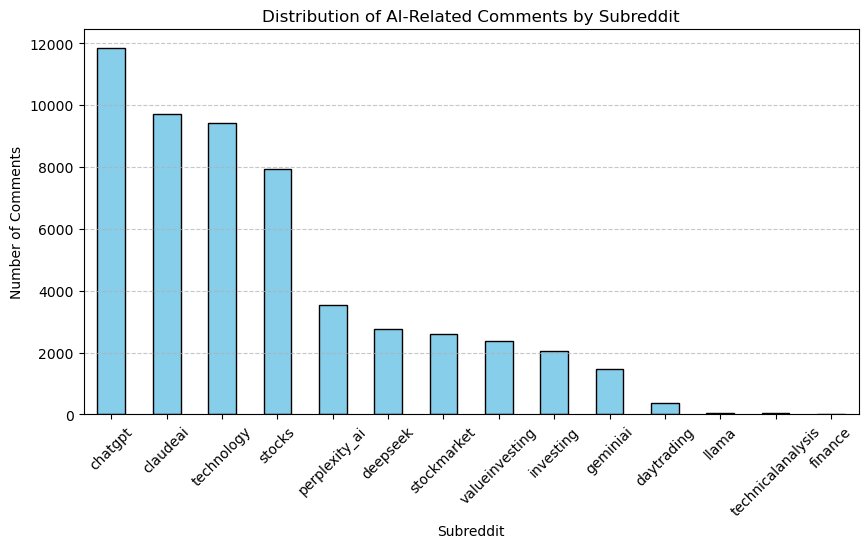

In [41]:

import matplotlib.pyplot as plt

# Count occurrences of each subreddit
subreddit_counts = merged_df["Subreddit"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 5))
subreddit_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Subreddit")
plt.ylabel("Number of Comments")
plt.title("Distribution of AI-Related Comments by Subreddit")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

C:\Users\vasistha\AppData\Local\Temp\ipykernel_14412\4272302846.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  timestamp_counts = new_merged_df.resample('M').size()  # Change 'M' to 'D' for daily or 'W' for weekly


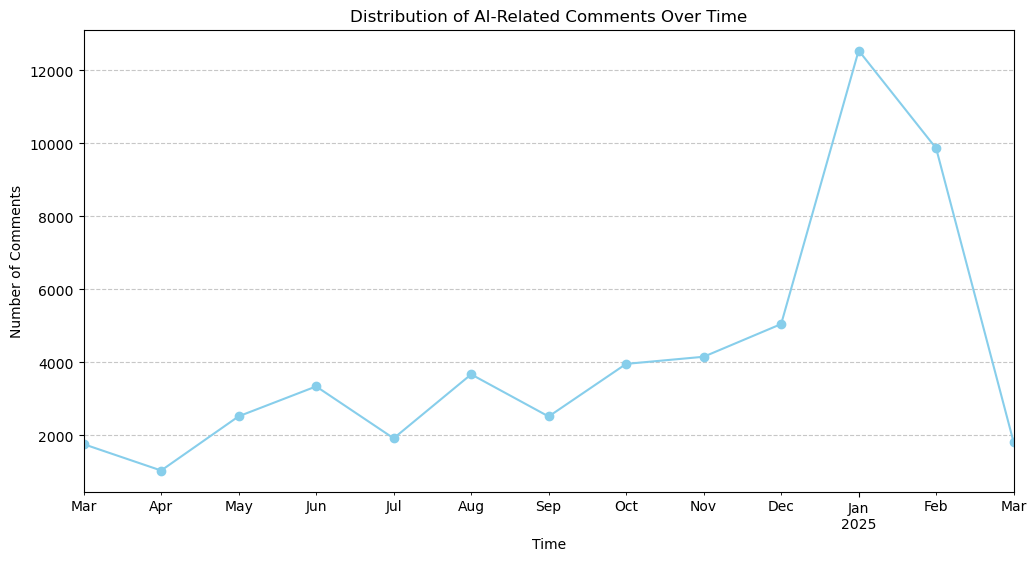

In [42]:
import matplotlib.pyplot as plt
new_merged_df = merged_df
# Convert Timestamp to datetime format
new_merged_df["Timestamp"] = pd.to_datetime(new_merged_df["Timestamp"])

# Count occurrences per time period (e.g., daily, weekly, or monthly)
new_merged_df.set_index("Timestamp", inplace=True)
timestamp_counts = new_merged_df.resample('M').size()  # Change 'M' to 'D' for daily or 'W' for weekly

# Plot time series chart
plt.figure(figsize=(12, 6))
timestamp_counts.plot(kind='line', marker='o', color='skyblue')
plt.xlabel("Time")
plt.ylabel("Number of Comments")
plt.title("Distribution of AI-Related Comments Over Time")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

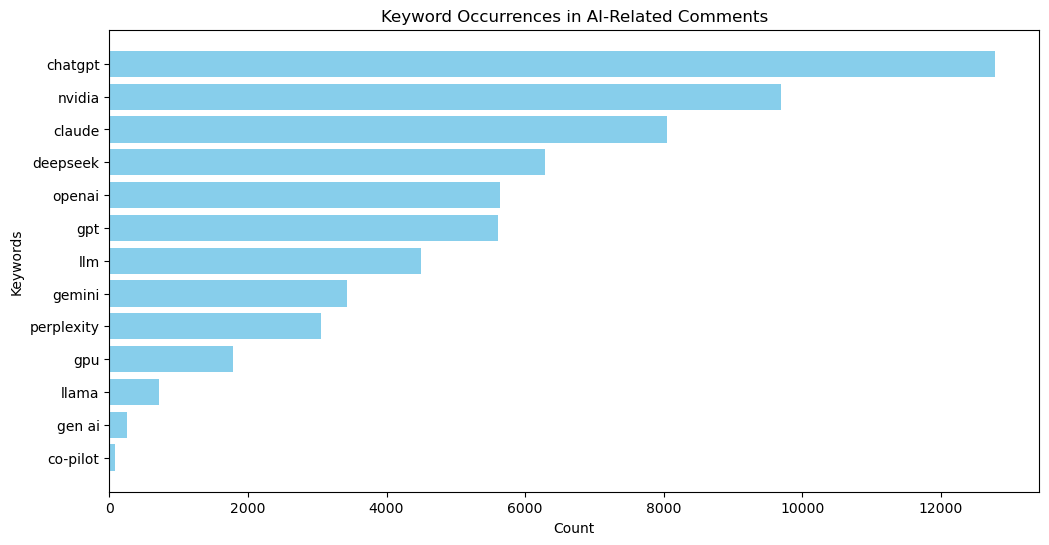

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import re



# List of AI-related keywords
ai_keywords = ["gpt", "llm", "gen ai", "chatgpt", "claude", "perplexity", "nvidia",
               "gpu", "gemini", "llama", "co-pilot", "deepseek", "openai"]

# Initialize a dictionary to store keyword counts
keyword_counts = {keyword: 0 for keyword in ai_keywords}

# Count occurrences of each keyword in the comments (case insensitive)
for comment in new_merged_df["Comment"].dropna():
    for keyword in ai_keywords:
        if re.search(rf'\b{re.escape(keyword)}\b', comment, re.IGNORECASE):
            keyword_counts[keyword] += 1

# Sort keywords by count for better visualization
sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)
keywords, counts = zip(*sorted_keywords)

# Plot the keyword occurrences
plt.figure(figsize=(12, 6))
plt.barh(keywords, counts, color='skyblue')
plt.xlabel("Count")
plt.ylabel("Keywords")
plt.title("Keyword Occurrences in AI-Related Comments")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

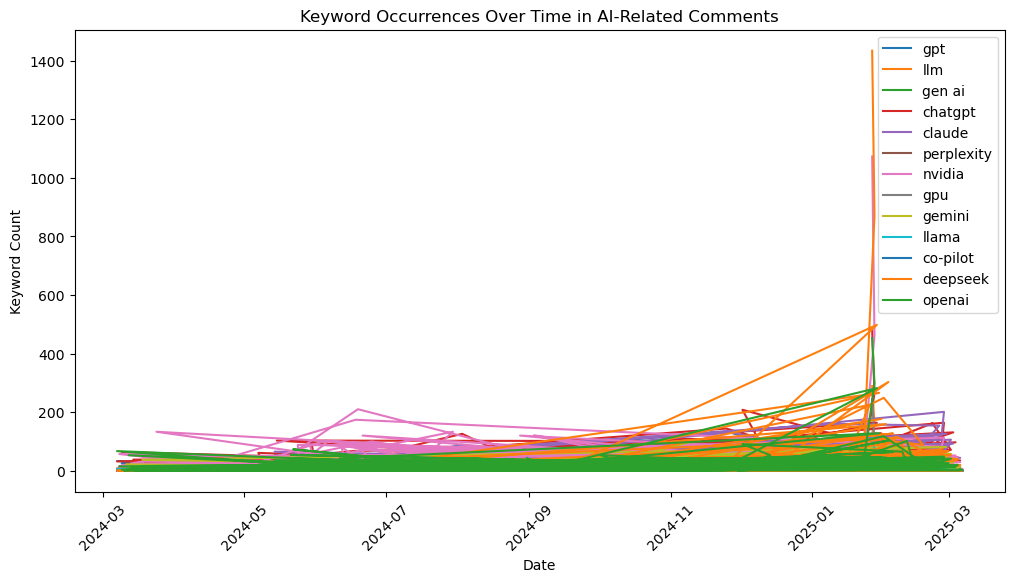

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import re


df = pd.read_csv("merged_unique.csv")

# Convert Timestamp column to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Date"] = df["Timestamp"].dt.date  # Extract date for aggregation

# List of AI-related keywords
ai_keywords = ["gpt", "llm", "gen ai", "chatgpt", "claude", "perplexity", "nvidia",
               "gpu", "gemini", "llama", "co-pilot", "deepseek", "openai"]

# Initialize a dictionary to store keyword counts by date
keyword_counts_by_date = {keyword: {} for keyword in ai_keywords}

# Count occurrences of each keyword per date
for _, row in df.iterrows():
    comment = row["Comment"]
    date = row["Date"]
    for keyword in ai_keywords:
        if re.search(rf'\b{re.escape(keyword)}\b', str(comment), re.IGNORECASE):
            keyword_counts_by_date[keyword][date] = keyword_counts_by_date[keyword].get(date, 0) + 1

# Convert to DataFrame
keyword_counts_df = pd.DataFrame(keyword_counts_by_date).fillna(0)

# Plot the keyword occurrences over time
plt.figure(figsize=(12, 6))
for keyword in ai_keywords:
    plt.plot(keyword_counts_df.index, keyword_counts_df[keyword], label=keyword)

plt.xlabel("Date")
plt.ylabel("Keyword Count")
plt.title("Keyword Occurrences Over Time in AI-Related Comments")
plt.legend()
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

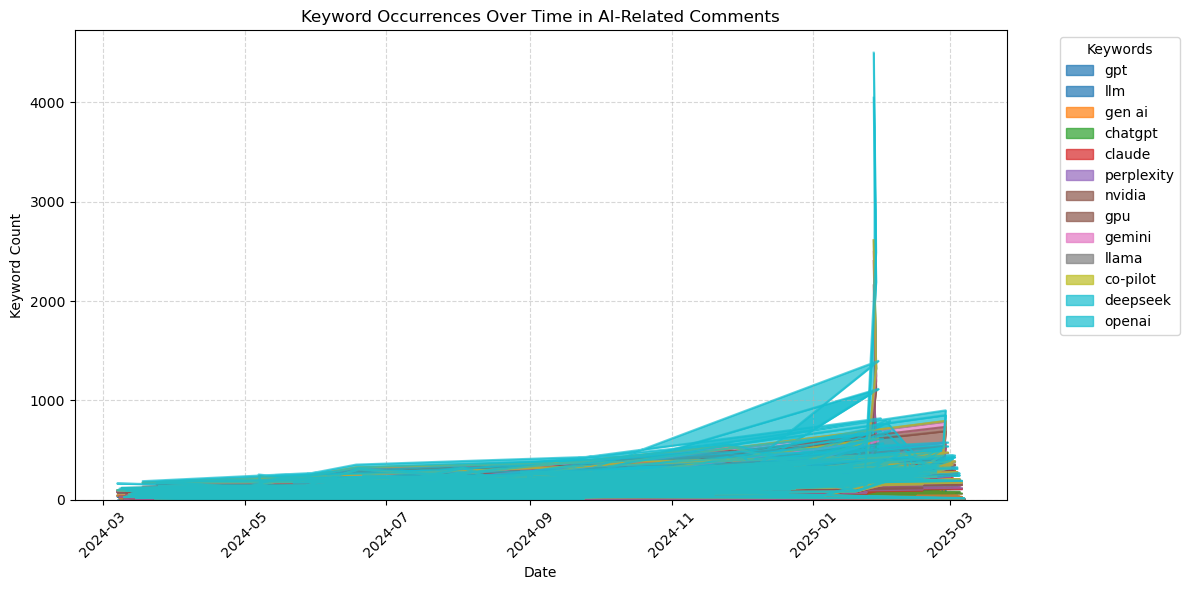

In [51]:

df = pd.read_csv("merged_unique.csv")
# Convert Timestamp column to datetime
df.columns = df.columns.str.strip()  # Ensure no leading/trailing spaces
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df.dropna(subset=["Timestamp"], inplace=True)  # Remove rows with invalid timestamps
df["Date"] = df["Timestamp"].dt.date  # Extract date for aggregation

# List of AI-related keywords
ai_keywords = ["gpt", "llm", "gen ai", "chatgpt", "claude", "perplexity", "nvidia",
               "gpu", "gemini", "llama", "co-pilot", "deepseek", "openai"]

# Initialize a dictionary to store keyword counts by date
keyword_counts_by_date = {keyword: {} for keyword in ai_keywords}

# Count occurrences of each keyword per date
for _, row in df.iterrows():
    comment = row["Comment"]
    date = row["Date"]
    for keyword in ai_keywords:
        if re.search(rf'\b{re.escape(keyword)}\b', str(comment), re.IGNORECASE):
            keyword_counts_by_date[keyword][date] = keyword_counts_by_date[keyword].get(date, 0) + 1

# Convert to DataFrame
keyword_counts_df = pd.DataFrame(keyword_counts_by_date).fillna(0)

# Plot the keyword occurrences over time using a stacked area chart
plt.figure(figsize=(12, 6))
keyword_counts_df.plot(kind='area', stacked=True, colormap='tab10', alpha=0.7, figsize=(12, 6))

plt.xlabel("Date")
plt.ylabel("Keyword Count")
plt.title("Keyword Occurrences Over Time in AI-Related Comments")
plt.legend(title="Keywords", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


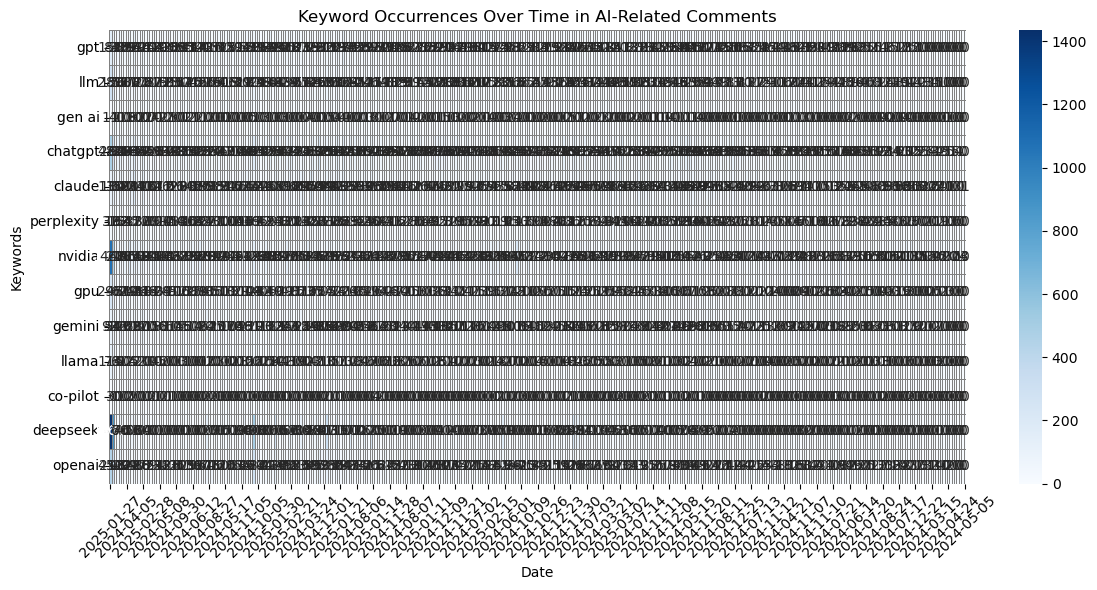

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


df = pd.read_csv("merged_unique.csv")

# Convert Timestamp column to datetime
df.columns = df.columns.str.strip()  # Ensure no leading/trailing spaces
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df.dropna(subset=["Timestamp"], inplace=True)  # Remove rows with invalid timestamps
df["Date"] = df["Timestamp"].dt.date  # Extract date for aggregation

# List of AI-related keywords
ai_keywords = ["gpt", "llm", "gen ai", "chatgpt", "claude", "perplexity", "nvidia",
               "gpu", "gemini", "llama", "co-pilot", "deepseek", "openai"]

# Initialize a dictionary to store keyword counts by date
keyword_counts_by_date = {keyword: {} for keyword in ai_keywords}

# Count occurrences of each keyword per date
for _, row in df.iterrows():
    comment = row["Comment"]
    date = row["Date"]
    for keyword in ai_keywords:
        if re.search(rf'\b{re.escape(keyword)}\b', str(comment), re.IGNORECASE):
            keyword_counts_by_date[keyword][date] = keyword_counts_by_date[keyword].get(date, 0) + 1

# Convert to DataFrame
keyword_counts_df = pd.DataFrame(keyword_counts_by_date).fillna(0)

# Plot the keyword occurrences over time using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(keyword_counts_df.T, cmap='Blues', linewidths=0.5, linecolor='gray', annot=True, fmt=".0f")

plt.xlabel("Date")
plt.ylabel("Keywords")
plt.title("Keyword Occurrences Over Time in AI-Related Comments")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

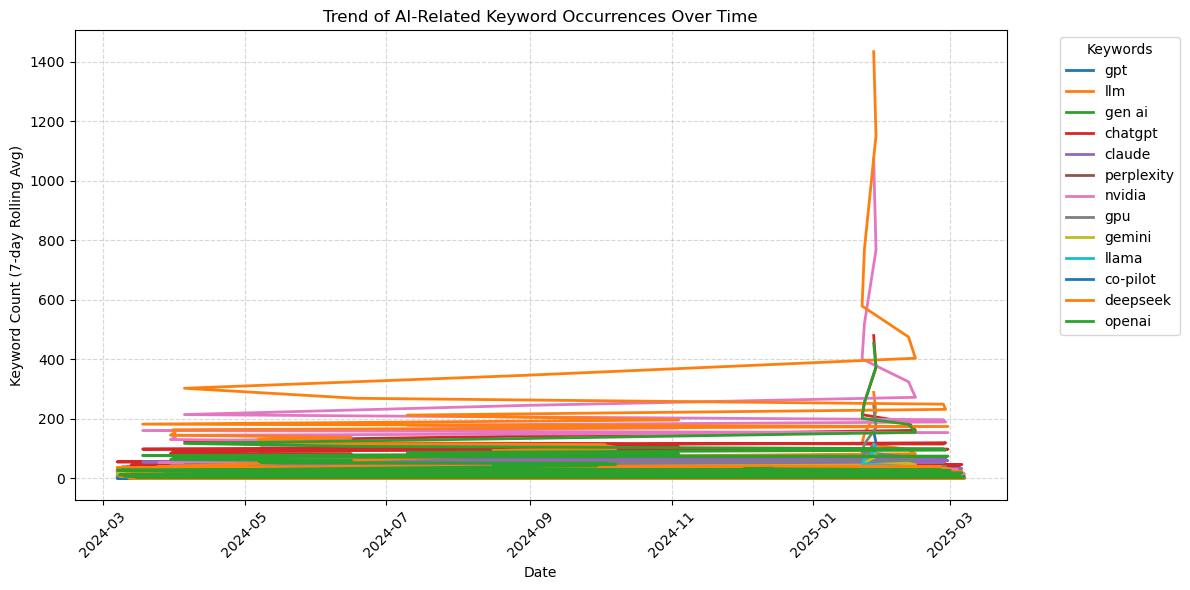

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


df = pd.read_csv("merged_unique.csv")

# Convert Timestamp column to datetime
df.columns = df.columns.str.strip()  # Ensure no leading/trailing spaces
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df.dropna(subset=["Timestamp"], inplace=True)  # Remove rows with invalid timestamps
df["Date"] = df["Timestamp"].dt.date  # Extract date for aggregation

# List of AI-related keywords
ai_keywords = ["gpt", "llm", "gen ai", "chatgpt", "claude", "perplexity", "nvidia",
               "gpu", "gemini", "llama", "co-pilot", "deepseek", "openai"]

# Initialize a dictionary to store keyword counts by date
keyword_counts_by_date = {keyword: {} for keyword in ai_keywords}

# Count occurrences of each keyword per date
for _, row in df.iterrows():
    comment = row["Comment"]
    date = row["Date"]
    for keyword in ai_keywords:
        if re.search(rf'\b{re.escape(keyword)}\b', str(comment), re.IGNORECASE):
            keyword_counts_by_date[keyword][date] = keyword_counts_by_date[keyword].get(date, 0) + 1

# Convert to DataFrame
keyword_counts_df = pd.DataFrame(keyword_counts_by_date).fillna(0)

# Resample data to smooth trends
keyword_counts_df = keyword_counts_df.rolling(window=30, min_periods=1).mean()

# Plot using multiple line charts
plt.figure(figsize=(12, 6))
for keyword in ai_keywords:
    plt.plot(keyword_counts_df.index, keyword_counts_df[keyword], label=keyword, linewidth=2)

plt.xlabel("Date")
plt.ylabel("Keyword Count (7-day Rolling Avg)")
plt.title("Trend of AI-Related Keyword Occurrences Over Time")
plt.legend(title="Keywords", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

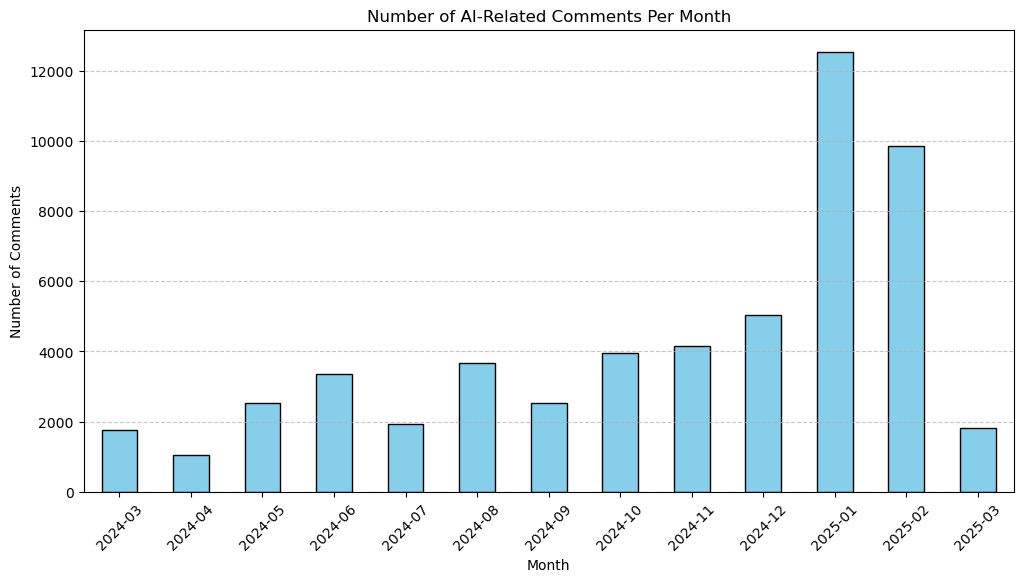

Mean :  4166.538461538462
Standard Deviation :  3365.7559481584676


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the CSV file
df = pd.read_csv("merged_unique.csv")

# Ensure the required column exists
if "Timestamp" not in df.columns:
    raise ValueError("The dataset does not contain a 'Timestamp' column.")

# Convert Timestamp to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Extract year and month
df["Year-Month"] = df["Timestamp"].dt.to_period("M")

# Count occurrences per month
monthly_counts = df["Year-Month"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.title("Number of AI-Related Comments Per Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
print("Mean : ",monthly_counts.mean())
print("Standard Deviation : ",monthly_counts.std())

In [5]:
%pip install transformers torch pandas


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("merged_unique.csv")  # Ensure correct file path
print(df.head())


             Timestamp Subreddit              Username  \
0  2025-01-27 21:35:35    stocks             wollywink   
1  2025-01-27 23:17:15    stocks              Zephos65   
2  2025-01-27 21:20:44    stocks              Jsand117   
3  2025-01-27 21:42:17    stocks    purplebrown_updown   
4  2025-01-27 22:23:55    stocks  ResidentResearcher94   

                                             Comment  
0  "Nvidia’s decline is more than double the mark...  
1  I'm a machine learning engineer.\n\nSince the ...  
2  Even though its most likely a giant overreacti...  
3  The freakout is because people are worried tha...  
4  Deepseek isn’t a competitor to Nvidia, it stil...  


In [2]:
from transformers import pipeline

# Load sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")


Device set to use cpu


In [3]:
def get_sentiment(text):
    try:
        if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
            return "Neutral"  # Default to neutral if text is missing

        # Process text (limit to 512 tokens)
        result = sentiment_analyzer(text[:512])  
        label_map = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}
        return label_map.get(result[0]["label"], "Neutral")  # Return sentiment
    except Exception as e:
        print(f"Error processing text: {text}\nException: {e}")
        return "Error"

# Apply sentiment function
df["Sentiment"] = df["Comment"].astype(str).apply(get_sentiment)

# Save updated dataset
df.to_csv("reddit_ai_comments_with_sentiment_Full.csv", index=False)

print("Sentiment analysis completed and saved!")


Error processing text: I tested on yuanbao tencent deepseek it also can return true answer below.

好的，我现在要解决用户的问题：“一个汉字具有左右结构，左边是木，右边是乞。这个字是什么？只需回答这个字即可”。首先，我需要仔细查看用户提供的搜索结果，看看里面有没有相关的信息。

首先看网页1，标题提到检验DeepSeek-R1是否为满血版的三个问题，其中第一个问题就是用户提到的这个汉字结构的问题，答案给出的是“杚”^1。这里明确指出正确答案是“杚”，并且说明只有满血版的模型才能正确回答。

接下来是网页2，内容详细讨论了用户的问题，测试了不同模型的结果。其中提到，满血版的DeepSeek-R1经过推理后正确回答为“杚”，而其他蒸馏版或阉割版模型如DeepSeek-V3、Gemini、Kimi等则无法正确回答，给出了错误答案如“杞”、“楂”等^2。这进一步确认了正确答案是“杚”。

网页3和网页4也重复了类似的内容，都提到通过这个问题可以鉴别模型是否为满血版，并且正确答案是“杚”^3^4。特别是网页4中详细测试了多个模型的回答，均显示只有满血版能正确识别这个字，其他模型则出现错误。

网页5中虽然部分内容可能涉及其他讨论，但主要信息仍指向“杚”作为正确答案，并强调其作为测试题的有效性^5。所有相关网页一致确认正确答案为“杚”，并且解释了该字的结构和读音。

总结所有搜索结果，所有可靠的来源都指出正确答案是“杚”，因此用户的问题答案应为“杚”。


这个字是 杚^1^2^3^4^5。  

该字由左部「木」和右部「乞」组成，属于生僻字，读音为 gài 或 gǔ，含义包括古代量粮食的工具（同“槩”）或树木形态的描述。此问题被用作测试 DeepSeek-R1 模型是否为满血版的标准答案，仅完整版模型能通过推理得出正确结果，而阉割版或蒸馏版模型常误答为“杞”“楂”等字。
Exception: The expanded size of the tensor (882) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 882].  Tensor sizes: [1,

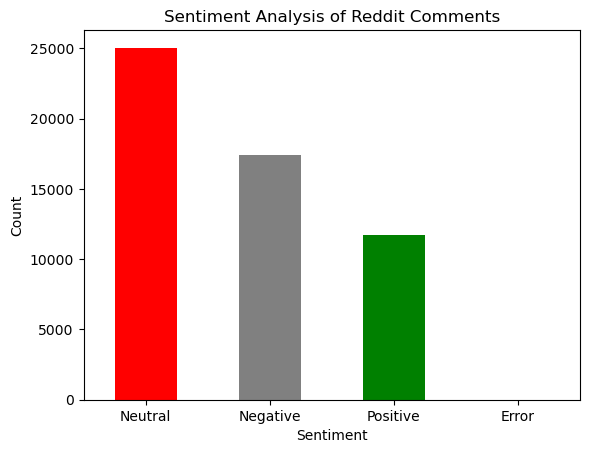

In [4]:
import matplotlib.pyplot as plt

# Count occurrences of each sentiment
sentiment_counts = df["Sentiment"].value_counts()

# Plot bar chart
sentiment_counts.plot(kind="bar", color=["red", "gray", "green", "black"])
plt.title("Sentiment Analysis of Reddit Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [5]:
import pandas as pd

# Load the dataset
file_path = "reddit_ai_comments_with_sentiment_Full.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert Timestamp column to datetime
df.columns = df.columns.str.strip()  # Ensure no leading/trailing spaces
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df.dropna(subset=["Timestamp"], inplace=True)  # Remove rows with invalid timestamps
df["Date"] = df["Timestamp"].dt.date  # Extract date for aggregation

# Count total comments per day
total_comments = df.groupby("Date").size().tolist()

# Count sentiment-based comments per day
sentiment_counts = df.groupby(["Date", "Sentiment"]).size().unstack(fill_value=0)

# Convert sentiment counts to lists
negative_comments = sentiment_counts.get("Negative", []).tolist()
positive_comments = sentiment_counts.get("Positive", []).tolist()
neutral_comments = sentiment_counts.get("Neutral", []).tolist()

# The four lists can now be used for merging with another CSV file
print(total_comments[:5], negative_comments[:5], positive_comments[:5], neutral_comments[:5])

print(df.head())

[159, 113, 126, 26, 88] [75, 30, 32, 7, 51] [21, 23, 40, 3, 9] [63, 60, 54, 16, 28]
            Timestamp Subreddit              Username  \
0 2025-01-27 21:35:35    stocks             wollywink   
1 2025-01-27 23:17:15    stocks              Zephos65   
2 2025-01-27 21:20:44    stocks              Jsand117   
3 2025-01-27 21:42:17    stocks    purplebrown_updown   
4 2025-01-27 22:23:55    stocks  ResidentResearcher94   

                                             Comment Sentiment        Date  
0  "Nvidia’s decline is more than double the mark...  Negative  2025-01-27  
1  I'm a machine learning engineer.\n\nSince the ...   Neutral  2025-01-27  
2  Even though its most likely a giant overreacti...  Negative  2025-01-27  
3  The freakout is because people are worried tha...  Negative  2025-01-27  
4  Deepseek isn’t a competitor to Nvidia, it stil...   Neutral  2025-01-27  


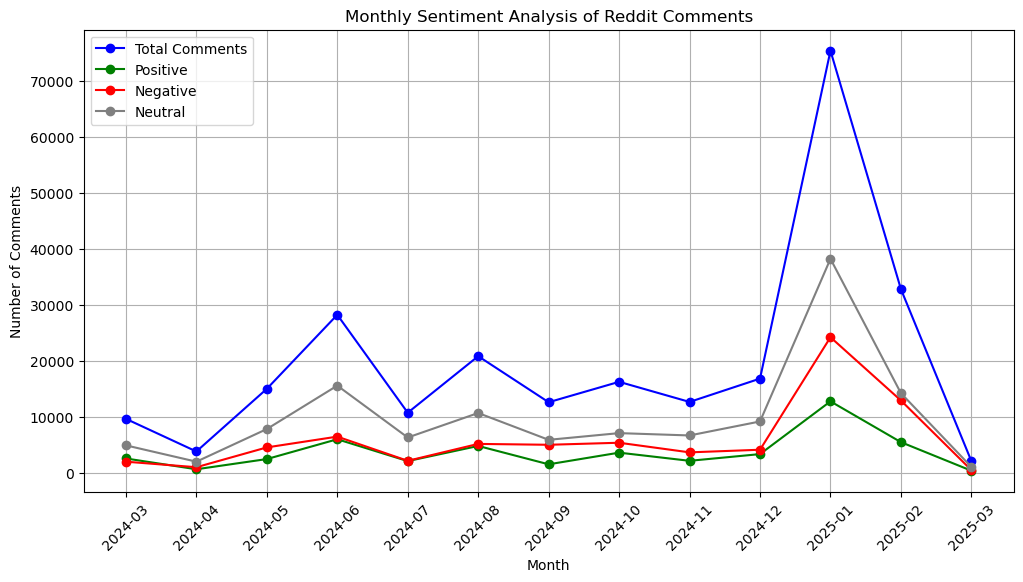

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("FirstMerge.csv")

# Convert timestamp column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extract year and month for grouping
df["Year-Month"] = df["Date"].dt.to_period("M")  # Format YYYY-MM

# Group by month and sum the comment counts
monthly_counts = df.groupby("Year-Month").agg(
    total_comments=("Total Comments", "sum"),
    positive_comments=("Positive Comments", "sum"),
    negative_comments=("Negative Comments", "sum"),
    neutral_comments=("Neutral Comments", "sum")
).reset_index()

# Convert 'Year-Month' to string for plotting
monthly_counts["Year-Month"] = monthly_counts["Year-Month"].astype(str)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts["Year-Month"], monthly_counts["total_comments"], label="Total Comments", color="blue", marker="o")
plt.plot(monthly_counts["Year-Month"], monthly_counts["positive_comments"], label="Positive", color="green", marker="o")
plt.plot(monthly_counts["Year-Month"], monthly_counts["negative_comments"], label="Negative", color="red", marker="o")
plt.plot(monthly_counts["Year-Month"], monthly_counts["neutral_comments"], label="Neutral", color="gray", marker="o")

plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.title("Monthly Sentiment Analysis of Reddit Comments")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
import pandas as pd

# Load the datasets
comments_file = "reddit_ai_comments_with_sentiment_Full.csv"  # Update with the correct file path
stocks_file = "daily_stock_data_with_indices.csv"  # Update with the correct file path

df_comments = pd.read_csv(comments_file)

df_stocks = pd.read_csv(stocks_file)

# Convert Timestamp and Date columns to datetime
df_comments.columns = df_comments.columns.str.strip()
df_comments["Timestamp"] = pd.to_datetime(df_comments["Timestamp"], errors='coerce')
df_comments.dropna(subset=["Timestamp"], inplace=True)
df_comments["Date"] = df_comments["Timestamp"].dt.date

df_stocks.columns = df_stocks.columns.str.strip()
df_stocks["Date"] = pd.to_datetime(df_stocks["Date"]).dt.date  # Ensure date format matches

# Count total comments per day
total_comments = df_comments.groupby("Date").size()

# Count sentiment-based comments per day
sentiment_counts = df_comments.groupby(["Date", "Sentiment"]).size().unstack(fill_value=0)
print(sentiment_counts.head())



#Merge comment data with stock data
df_merged = df_stocks.copy()
df_merged["Total Comments"] = df_merged["Date"].map(total_comments).fillna(0).astype(int)
df_merged["Negative Comments"] = df_merged["Date"].map(sentiment_counts.get("Negative", 0)).fillna(0).astype(int)
df_merged["Positive Comments"] = df_merged["Date"].map(sentiment_counts.get("Positive", 0)).fillna(0).astype(int)
df_merged["Neutral Comments"] = df_merged["Date"].map(sentiment_counts.get("Neutral", 0)).fillna(0).astype(int)

#Display the merged dataframe
print(df_merged.head())

df_merged.to_csv("SecondMerge.csv")

Sentiment   Error  Negative  Neutral  Positive
Date                                          
2024-03-07      0        75       63        21
2024-03-08      0        30       60        23
2024-03-09      0        32       54        40
2024-03-10      0         7       16         3
2024-03-11      0        51       28         9
         Date Stock        Open        High         Low       Close  \
0  2024-03-01  AAPL  178.706190  179.681580  176.546390  178.815674   
1  2024-03-01  ABBV  169.862331  172.891969  169.572873  172.621811   
2  2024-03-01  ADBE  561.109985  572.890015  560.669983  570.929993   
3  2024-03-01   AMD  197.910004  202.720001  195.419998  202.639999   
4  2024-03-01  AMZN  176.750000  178.729996  176.070007  178.220001   

      Volume  Daily_Return  Total Comments  Negative Comments  \
0   73488000     -0.006030               0                  0   
1    4028700      0.016245               0                  0   
2    2903700      0.019008               0       

In [22]:
comments_file = "reddit_ai_comments_with_sentiment_Full.csv"  # Update with the correct file path
stocks_file = "daily_stock_data_with_indices.csv"  # Update with the correct file path

df_comments = pd.read_csv(comments_file)
# Convert Timestamp and Date columns to datetime
df_comments.columns = df_comments.columns.str.strip()
df_comments["Timestamp"] = pd.to_datetime(df_comments["Timestamp"], errors='coerce')
df_comments.dropna(subset=["Timestamp"], inplace=True)
df_comments["Date"] = df_comments["Timestamp"].dt.date
topic_counts = df_comments.groupby(["Date", "Topic"]).size().unstack(fill_value=0)
topic_counts = topic_counts[:10][:]
print(topic_counts)

Topic       -1     0     1     2     3     4     5     6     7     8    ...  \
Date                                                                    ...   
2024-03-07    56     1    19     1     0     1     3     0     0     0  ...   
2024-03-08    46     1     4     0     0     0     1     2     1     0  ...   
2024-03-09    58     2     7     0     2     3     7     2     0     0  ...   
2024-03-10    13     0     1     0     0     0     0     0     1     0  ...   
2024-03-11    35    19     4     0     1     1     1     0     0     0  ...   
2024-03-12    35     4     0     0     0     0     0     0     4     0  ...   
2024-03-13    31     2     0     0     1     2     2     0     0     0  ...   
2024-03-14    46     0     4     1     3     1     1     0     0     0  ...   
2024-03-15     9     0     0     0     0     0     0     0     0     0  ...   
2024-03-16    17     1     6     1     0     3     0     0     0     0  ...   

Topic        458   459   460   461   462   463   46

In [24]:
df_stocks = pd.read_csv(stocks_file)
df_merged = df_stocks.copy()
df_merged["Topic1"] = df_merged["Date"].map(lambda x: topic_counts.get(x, {}).get("-1", 0)).fillna(0).astype(int)
print(df_merged["Topic1"])


0        0
1        0
2        0
3        0
4        0
        ..
13203    0
13204    0
13205    0
13206    0
13207    0
Name: Topic1, Length: 13208, dtype: int32


In [25]:
print("Available dates in topic_counts:", list(topic_counts.keys())[:10])  # Print first 10 dates
print("First few dates in df_merged:", df_merged["Date"].head())

Available dates in topic_counts: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
First few dates in df_merged: 0    3/1/2024
1    3/1/2024
2    3/1/2024
3    3/1/2024
4    3/1/2024
Name: Date, dtype: object


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("FirstMerge.csv")

# Convert timestamp column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extract month and year
df["Year-Month"] = df["Date"].dt.to_period("M")  # Format YYYY-MM

# Count total comments and sentiment categories per month
monthly_counts = df.groupby("Year-Month").agg(
    total_comments=("Sentiment", "count"),
    positive_comments=("Sentiment", lambda x: (x == "Positive").sum()),
    negative_comments=("Sentiment", lambda x: (x == "Negative").sum()),
    neutral_comments=("Sentiment", lambda x: (x == "Neutral").sum())
).reset_index()

# Convert Year-Month back to string for plotting
monthly_counts["Year-Month"] = monthly_counts["Year-Month"].astype(str)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts["Year-Month"], monthly_counts["total_comments"], label="Total Comments", color="blue", marker="o")
plt.plot(monthly_counts["Year-Month"], monthly_counts["positive_comments"], label="Positive", color="green", marker="o")
plt.plot(monthly_counts["Year-Month"], monthly_counts["negative_comments"], label="Negative", color="red", marker="o")
plt.plot(monthly_counts["Year-Month"], monthly_counts["neutral_comments"], label="Neutral", color="gray", marker="o")

plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.title("Monthly Sentiment Analysis of Reddit Comments")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


KeyError: "Column(s) ['Sentiment'] do not exist"

In [34]:
import pandas as pd

# Load datasets
comments_file = "reddit_ai_comments_with_sentiment_Full.csv"  # Update with the correct file path
stocks_file = "SecondMerge_Updated.csv"  # Update with the correct file path

df_comments = pd.read_csv(comments_file)
df_stocks = pd.read_csv(stocks_file)

# Convert Timestamp and Date columns to datetime
df_comments.columns = df_comments.columns.str.strip()
df_comments["Timestamp"] = pd.to_datetime(df_comments["Timestamp"], errors='coerce')
df_comments.dropna(subset=["Timestamp"], inplace=True)
df_comments["Date"] = df_comments["Timestamp"].dt.date

# Convert Date column in stock dataset with proper format handling
df_stocks["Date"] = pd.to_datetime(df_stocks["Date"], format="%d-%m-%Y", errors="coerce").dt.date


# Identify top 10 topics
top_10_topics = df_comments["Topic"].value_counts().nlargest(10).index

# Create a DataFrame for topic counts per day
topic_counts = df_comments[df_comments["Topic"].isin(top_10_topics)]
topic_counts = topic_counts.groupby(["Date", "Topic"]).size().unstack(fill_value=0).reset_index()

# Merge with stock dataset
merged_df = df_stocks.merge(topic_counts, on="Date", how="left")

# Fill missing values with 0 (if some dates have no topic mentions)
merged_df.fillna(0, inplace=True)

# Save the merged dataset
merged_df.to_csv("merged_stock_topic_data.csv", index=False)

# Display sample output
print(merged_df.head())



   Unnamed: 0        Date Stock        Open        High         Low  \
0         208  2024-03-07  AAPL  168.355039  169.927615  167.698152   
1         209  2024-03-07  ABBV  175.786522  176.008434  173.229653   
2         210  2024-03-07  ADBE  550.000000  558.380005  541.590027   
3         211  2024-03-07   AMD  212.520004  213.830002  208.220001   
4         212  2024-03-07  AMZN  174.830002  177.990005  173.720001   

        Close    Volume  Daily_Return  Total Comments  ...    -1    0     1  \
0  168.205749  71765100     -0.000710             159  ...  56.0  1.0  19.0   
1  174.223465   6125200     -0.002706             159  ...  56.0  1.0  19.0   
2  556.039978   2660500      0.023845             159  ...  56.0  1.0  19.0   
3  211.380005  63869000      0.003561             159  ...  56.0  1.0  19.0   
4  176.820007  34063300      0.019077             159  ...  56.0  1.0  19.0   

     2    3    4    5    6    7    8  
0  1.0  0.0  1.0  3.0  0.0  0.0  0.0  
1  1.0  0.0  1.0  3.

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv("reddit_ai_comments_with_sentiment_Full.csv")  # Replace with your actual file

# Step 1: Prepare the Date
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df["Date"] = df["Timestamp"].dt.date

# Step 2: Clean Topic Column
df["Topic"] = df["Topic"].astype(str)

# Step 3: Find Top 10 Topics (by total counts across all days)
top_10_topics = df["Topic"].value_counts().nlargest(10).index.tolist()

# Step 4: Filter the DataFrame to only include top 10 topics
df_top10 = df[df["Topic"].isin(top_10_topics)].copy()

# Step 5: Create combined Topic-Sentiment column
df_top10["Topic_Sentiment"] = "topic_" + df_top10["Topic"] + "_" + df_top10["Sentiment"].str.lower()

# Step 6: Group by Date and Topic_Sentiment
daily_topic_sentiment = df_top10.groupby(["Date", "Topic_Sentiment"]).size().unstack(fill_value=0).reset_index()



# Display sample
print(daily_topic_sentiment.head())





Topic_Sentiment        Date  topic_-1_error  topic_-1_negative  \
0                2024-03-07               0                 30   
1                2024-03-08               0                  6   
2                2024-03-09               0                 11   
3                2024-03-10               0                  4   
4                2024-03-11               0                 23   

Topic_Sentiment  topic_-1_neutral  topic_-1_positive  topic_0_negative  \
0                              18                  8                 1   
1                              26                 14                 0   
2                              23                 24                 0   
3                               6                  3                 0   
4                               5                  7                15   

Topic_Sentiment  topic_0_neutral  topic_0_positive  topic_1_negative  \
0                              0                 0                 9   
1             

In [3]:
# Assuming your DataFrame is called daily_topic_sentiment
daily_topic_sentiment = daily_topic_sentiment.drop(columns=["topic_-1_error"])

# Verify
print(daily_topic_sentiment.head())

Topic_Sentiment        Date  topic_-1_negative  topic_-1_neutral  \
0                2024-03-07                 30                18   
1                2024-03-08                  6                26   
2                2024-03-09                 11                23   
3                2024-03-10                  4                 6   
4                2024-03-11                 23                 5   

Topic_Sentiment  topic_-1_positive  topic_0_negative  topic_0_neutral  \
0                                8                 1                0   
1                               14                 0                0   
2                               24                 0                2   
3                                3                 0                0   
4                                7                15                4   

Topic_Sentiment  topic_0_positive  topic_1_negative  topic_1_neutral  \
0                               0                 9                8   
1       

In [6]:
stock_df = pd.read_csv("merged_stock_topic_data_2.csv")
stock_df["Date"] = pd.to_datetime(stock_df["Date"], format='mixed', errors='coerce')


# Merge
merged_df = pd.merge(stock_df, daily_topic_sentiment, on="Date", how="left").fillna(0)

# Save merged file if needed
merged_df.to_csv("final_merged_stock_topic_sentiment.csv", index=False)

print(merged_df.head())

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [8]:
import pandas as pd

# Load your datasets
stock_df = pd.read_csv("daily_stock_data_with_indices_vol.csv")


# 1. Convert BOTH "Date" columns to datetime64[ns]
stock_df["Date"] = pd.to_datetime(stock_df["Date"], errors='coerce')
daily_topic_sentiment["Date"] = pd.to_datetime(daily_topic_sentiment["Date"], errors='coerce')

# 2. Double check
print(stock_df["Date"].dtype)  # should show datetime64[ns]
print(daily_topic_sentiment["Date"].dtype)  # should show datetime64[ns]

# 3. Now merge
merged_df = pd.merge(stock_df, daily_topic_sentiment, on="Date", how="left").fillna(0)

# 4. Save if needed
merged_df.to_csv("final_merged_stock_topic_sentiment.csv", index=False)

print(merged_df.head())



datetime64[ns]
datetime64[ns]
   Unnamed: 0                 Date Stock        Open        High         Low  \
0        1071  2024-03-01 00:00:00  AAPL  178.706190  179.681580  176.546390   
1        1072  2024-03-01 00:00:00  ABBV  169.862331  172.891968  169.572873   
2        1073  2024-03-01 00:00:00  ADBE  561.109985  572.890015  560.669983   
3        1074  2024-03-01 00:00:00   AMD  197.910004  202.720001  195.419998   
4        1075  2024-03-01 00:00:00  AMZN  176.750000  178.729996  176.070007   

        Close     Volume  Daily_Return  Volatility_10  ...  topic_5_positive  \
0  178.815674   73488000     -0.006030       0.007422  ...               0.0   
1  172.621811    4028700      0.016245       0.008756  ...               0.0   
2  570.929993    2903700      0.019008       0.028600  ...               0.0   
3  202.639999  103583000      0.052511       0.051419  ...               0.0   
4  178.220001   31956200      0.008260       0.014405  ...               0.0   

   topic

In [ ]:
import requests
import time
from dateutil.relativedelta import relativedelta
import datetime

PUSHSHIFT_ENDPOINT = "https://api.pushshift.io/v1/submission/search/"

HEADERS = {
    "User-Agent": "reddit-scraper/0.1 (by u/Spirited-End7406)"
}

def fetch_submission_ids(subreddit, after_ts, before_ts, min_window_days=1):
    """
    Recursively page through Pushshift. On 403, split the window in half and retry.
    Stops when window < min_window_days.
    """
    window_sec = before_ts - after_ts
    if window_sec < min_window_days * 86400:
        # window too small to split further
        return []

    ids = []
    params = {
        "subreddit": subreddit,
        "after":    after_ts,
        "before":   before_ts,
        "size":     1000,
        "sort":     "asc",
        "sort_type":"created_utc",
        "fields":   ["id","created_utc"]
    }
    try:
        resp = requests.get(PUSHSHIFT_ENDPOINT, params=params, headers=HEADERS, timeout=30)
        resp.raise_for_status()
        data = resp.json().get("data", [])
        # collect IDs & advance
        for post in data:
            ids.append(post["id"])
        # if full‐batch, there might be more in this window: page by the last timestamp
        if len(data) == params["size"]:
            last_ts = data[-1]["created_utc"]
            # recurse on the remainder of the window
            ids += fetch_submission_ids(subreddit, last_ts, before_ts, min_window_days)
        return ids

    except requests.exceptions.HTTPError as e:
        if resp.status_code == 403:
            # split into two halves
            mid_ts = after_ts + window_sec // 2
            print(f"  403 on window {datetime.datetime.fromtimestamp(after_ts)}→{datetime.datetime.fromtimestamp(before_ts)}, splitting.")
            left  = fetch_submission_ids(subreddit, after_ts, mid_ts,    min_window_days)
            right = fetch_submission_ids(subreddit, mid_ts,    before_ts, min_window_days)
            return left + right
        else:
            raise

# # Example usage inside your monthly loop:
# start = datetime.datetime.now() - relativedelta(years=3)
# end   = datetime.datetime.now()
# current = start
# all_ids = []
# while current < end:
#     window_end = min(current + relativedelta(months=1), end)
#     a_ts = int(current.timestamp())
#     b_ts = int(window_end.timestamp())
#     print(f"Window {current.date()} → {window_end.date()}", end="")
#     ids = fetch_submission_ids("stocks", a_ts, b_ts)
#     print(f" → {len(ids)} posts")
#     all_ids.extend(ids)
#     current = window_end


In [7]:
%pip install psaw

Note: you may need to restart the kernel to use updated packages.


## Data collection 26-04-2025

In [ ]:
import requests
import praw
import pandas as pd
import datetime
import time
from dateutil.relativedelta import relativedelta

# ─── 0. PRAW setup ───────────────────────────────────────────────────────────
reddit = praw.Reddit(
    client_id='JibZxphvSqXQJrd38FNV0g',
    client_secret='7gmJmrw9XCuczg4nQqgDu_8fV94mBQ',
    user_agent="my user agent"
)

# ─── 1. Configuration ────────────────────────────────────────────────────────
# subreddits = ["stocks", "stockmarket","chatgpt","technology","investing","stockmarketanalysis","valueinvesting","llama","perplexity_ai","claudeai","locallama","geminiai","deepseek"]
# ai_keywords = ["gpt", "llm", "gen ai", "chatgpt", "claude","perplexity", "nvidia","gpu","gemini","llama","co-pilot","deepseek","openai"]

subreddits = [
    "stocks", "stockmarket", "chatgpt", "technology", "investing",
    "stockmarketanalysis", "valueinvesting", 
    # AI-centric finance spaces
    "AIStocks", "quantfinance", "AlgoTrading",
    # General AI & ML communities
    "MachineLearning", "deeplearning", "DataScience",
    "Artificial", "AIProgramming", "opensourceAI",
    # Vendor/model-specific forums
    "OpenAI", "Anthropic", "MistralAI", 
    "llama", "llama2", "localllama", 
    "perplexity_ai", "claudeai", "GeminiAI",
    "deepseek", "GROK", "AIethics", "AIart"
]

ai_keywords = [
    "gpt", "gpt-3", "gpt-4", "llm", "gen ai", "chatgpt", "chatgpt4",
    "openai", "claude", "perplexity", "gemini", "gemini advanced",
    "nvidia", "gpu", "llama", "llama2", "deepseek", "copilot",
    # image & multi-modal models
    "dall-e", "stable diffusion", "midjourney", "ai art",
    # foundational & transformer lingo
    "transformer", "bert", "roberta", "foundation model", 
    "flan-t5", "whisper", "vector database", "langchain",
    # emerging startups / services
    "mistral", "anthropic", "grok", "sora", "mistralai"
]

start_date = datetime.datetime.now() - relativedelta(years=3)
end_date   = datetime.datetime.now()
batch_size = 1000      # Pushshift max per call
pause_sec  = 1.0       # polite pause

# ─── 2. Helper: collect all submission IDs in a time window ─────────────────
# def fetch_submission_ids(subreddit, after_ts, before_ts):
#     ids = []
#     last = after_ts
#     while True:
#         params = {
#             "subreddit":   subreddit,
#             "after":       last,
#             "before":      before_ts,
#             "size":        batch_size,
#             "sort":        "asc",
#             "sort_type":   "created_utc",
#             "fields":      ["id","created_utc"]
#         }
#         resp = requests.get("https://api.pushshift.io/reddit/search/submission/", params=params)
#         resp.raise_for_status()
#         data = resp.json().get("data", [])
#         if not data:
#             break
#         for post in data:
#             ids.append(post["id"])
#             last = post["created_utc"]
#         # if we got fewer than batch_size, we’ve exhausted this window
#         if len(data) < batch_size:
#             break
#         time.sleep(pause_sec)
#     return ids

# ─── 3. Main: loop by month, then fetch comments via PRAW ───────────────────
def fetch_comments_three_years():
    all_rows = []
    for sub in subreddits:
        print(f"\n=== r/{sub} from {start_date.date()} to {end_date.date()} ===")
        # iterate month by month
        current = start_date
        while current < end_date:
            window_end = min(current + relativedelta(months=1), end_date)
            after_ts  = int(current.timestamp())
            before_ts = int(window_end.timestamp())
            print(f" • Window {current.date()} → {window_end.date()}", end="")

            # 3.1 collect *all* submission IDs in this month
            ids = fetch_submission_ids(sub, after_ts, before_ts)
            print(f" → {len(ids)} posts", end="")

            # 3.2 fetch comments for each submission
            for post_id in ids:
                try:
                    subm = reddit.submission(id=post_id)
                    subm.comments.replace_more(limit=0)
                    for c in subm.comments.list():
                        # keyword filter
                        text = c.body or ""
                        if any(kw.lower() in text.lower() for kw in ai_keywords):
                            all_rows.append({
                                "Timestamp":  datetime.datetime.fromtimestamp(c.created_utc),
                                "Subreddit":  sub,
                                "Username":   c.author.name if c.author else "[deleted]",
                                "Comment":    text
                            })
                except Exception:
                    continue

            current = window_end
            print()  # newline for this month
    return pd.DataFrame(all_rows)

# ─── 4. Run & Save ───────────────────────────────────────────────────────────
if __name__ == "__main__":
    df = fetch_comments_three_years()
    df.to_csv("reddit_ai_comments_3yrs.csv", index=False)
    print(f"\n✅ Done — collected {len(df)} comments over 3 years")



=== r/stocks from 2022-04-26 to 2025-04-26 ===
 • Window 2022-04-26 → 2022-05-26

HTTPError: 404 Client Error: Not Found for url: https://api.pushshift.io/v1/submission/search/?subreddit=stocks&after=1651003105&before=1653595105&size=1000&sort=asc&sort_type=created_utc&fields=id&fields=created_utc

In [5]:
from psaw import PushshiftAPI
import praw
import pandas as pd
import datetime
import time
from dateutil.relativedelta import relativedelta
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# ─── 0. PRAW & PSAW setup ──────────────────────────────────────────────────
reddit = praw.Reddit(
    client_id='JibZxphvSqXQJrd38FNV0g',
    client_secret='7gmJmrw9XCuczg4nQqgDu_8fV94mBQ',
    user_agent="my user agent"
)
# ps = PushshiftAPI()



PUSHSHIFT_SUBMISSION_URL = "https://api.pushshift.io/reddit/search/submission/"
HEADERS = {"User-Agent": "reddit-scraper/0.1 (by u/Spirited-End7406)"}


# ─── 2. NEW fetch_submission_ids HERE ────────────────────────

def fetch_submission_ids(subreddit, after_ts, before_ts, min_window_days=1, 
                         pause_sec=2.0, max_retries=3):
    """
    Pages through Pushshift v0, with:
      - exponential back-off on 429
      - split-window on 403/404
      - a small pause between *each* request
    """
    # If window too small, give up
    if before_ts - after_ts < min_window_days * 86400:
        return []

    # Prepare a session with retry on connection errors
    session = requests.Session()
    retry = Retry(
        total=max_retries,
        backoff_factor=1,
        status_forcelist=[429, 500, 502, 503, 504],
        allowed_methods=["GET"]
    )
    session.mount("https://", HTTPAdapter(max_retries=retry))
    session.mount("http://", HTTPAdapter(max_retries=retry))
    session.headers.update(HEADERS)

    params = {
        "subreddit":  subreddit,
        "after":      after_ts,
        "before":     before_ts,
        "size":       1000,
        "sort":       "asc",
        "sort_type":  "created_utc",
        "fields":     ["id", "created_utc"]
    }

    try:
        # throttle
        time.sleep(pause_sec)
        resp = session.get(PUSHSHIFT_SUBMISSION_URL, params=params, timeout=30)
        resp.raise_for_status()
        data = resp.json().get("data", [])
        ids = [post["id"] for post in data]

        # if we hit the cap, page again from the last timestamp
        if len(data) == params["size"]:
            last_ts = data[-1]["created_utc"]
            ids += fetch_submission_ids(
                subreddit, last_ts, before_ts,
                min_window_days=min_window_days,
                pause_sec=pause_sec,
                max_retries=max_retries
            )

        return ids

    except requests.HTTPError as e:
        code = e.response.status_code
        if code == 429:
            # Too many requests: wait longer then retry same window
            print(f"  429 rate-limit hit; backing off for 30s before retrying.")
            time.sleep(30)
            return fetch_submission_ids(
                subreddit, after_ts, before_ts,
                min_window_days=min_window_days,
                pause_sec=pause_sec,
                max_retries=max_retries
            )
        elif code in (403, 404):
            # Forbidden or Not Found: split window in two
            mid_ts = after_ts + (before_ts - after_ts) // 2
            return (
                fetch_submission_ids(subreddit, after_ts, mid_ts,    min_window_days, pause_sec, max_retries) +
                fetch_submission_ids(subreddit, mid_ts,    before_ts, min_window_days, pause_sec, max_retries)
            )
        else:
            # re-raise anything else
            raise


# ─── 1. Config ─────────────────────────────────────────────────────────────


# start_dt    = datetime.datetime.now() - relativedelta(years=3)
# end_dt      = datetime.datetime.now()

# ─── 2. Fetch via PSAW + PRAW ──────────────────────────────────────────────
def fetch_comments_three_years():
    subreddits = [
    "stocks", "stockmarket", "chatgpt", "technology", "investing",
    "stockmarketanalysis", "valueinvesting", 
    # AI-centric finance spaces
    "AIStocks", "quantfinance", "AlgoTrading",
    # General AI & ML communities
    "MachineLearning", "deeplearning", "DataScience",
    "Artificial", "AIProgramming", "opensourceAI",
    # Vendor/model-specific forums
    "OpenAI", "Anthropic", "MistralAI", 
    "llama", "llama2", "localllama", 
    "perplexity_ai", "claudeai", "GeminiAI",
    "deepseek", "GROK", "AIethics", "AIart"
]

    ai_keywords = [
    "gpt", "gpt-3", "gpt-4", "llm", "gen ai", "chatgpt", "chatgpt4",
    "openai", "claude", "perplexity", "gemini", "gemini advanced",
    "nvidia", "gpu", "llama", "llama2", "deepseek", "copilot",
    # image & multi-modal models
    "dall-e", "stable diffusion", "midjourney", "ai art",
    # foundational & transformer lingo
    "transformer", "bert", "roberta", "foundation model", 
    "flan-t5", "whisper", "vector database", "langchain",
    # emerging startups / services
    "mistral", "anthropic", "grok", "sora", "mistralai"
        ]
    start = datetime.datetime.now() - relativedelta(years=3)
    end   = datetime.datetime.now()

    all_rows = []
    for sub in subreddits:
        print(f"\n=== r/{sub} {start.date()} → {end.date()} ===")
        current = start
        while current < end:
            window_end = min(current + relativedelta(months=1), end)
            a_ts = int(current.timestamp())
            b_ts = int(window_end.timestamp())

            print(f"Window {current.date()}→{window_end.date()}", end="")
            ids = fetch_submission_ids(sub, a_ts, b_ts)
            print(f" → {len(ids)} posts", end="")

            # PRAW fetch comments
            for pid in ids:
                submission = reddit.submission(id=pid)
                submission.comments.replace_more(limit=0)
                for c in submission.comments.list():
                    ts = datetime.datetime.fromtimestamp(c.created_utc)
                    text = c.body or ""
                    if any(kw.lower() in text.lower() for kw in ai_keywords):
                        all_rows.append({
                            "Timestamp": ts,
                            "Subreddit": sub,
                            "Username":  c.author.name if c.author else "[deleted]",
                            "Comment":   text
                        })
            current = window_end
            print()

    return pd.DataFrame(all_rows)

# ─── 3. Run & Save ─────────────────────────────────────────────────────────
if __name__ == "__main__":
    df = fetch_comments_three_years()
    df.to_csv("reddit_ai_comments_3yrs_psaw.csv", index=False)
    print(f"\n✅ Done — collected {len(df)} comments over 3 years")



=== r/stocks 2022-04-26 → 2025-04-26 ===
Window 2022-04-26→2022-05-26 → 0 posts
Window 2022-05-26→2022-06-26 → 0 posts
Window 2022-06-26→2022-07-26 → 0 posts
Window 2022-07-26→2022-08-26 → 0 posts
Window 2022-08-26→2022-09-26 → 0 posts
Window 2022-09-26→2022-10-26 → 0 posts
Window 2022-10-26→2022-11-26 → 0 posts
Window 2022-11-26→2022-12-26 → 0 posts
Window 2022-12-26→2023-01-26 → 0 posts
Window 2023-01-26→2023-02-26 → 0 posts
Window 2023-02-26→2023-03-26 → 0 posts
Window 2023-03-26→2023-04-26 → 0 posts
Window 2023-04-26→2023-05-26 → 0 posts
Window 2023-05-26→2023-06-26 → 0 posts
Window 2023-06-26→2023-07-26 → 0 posts
Window 2023-07-26→2023-08-26 → 0 posts
Window 2023-08-26→2023-09-26 → 0 posts
Window 2023-09-26→2023-10-26 → 0 posts
Window 2023-10-26→2023-11-26 → 0 posts
Window 2023-11-26→2023-12-26 → 0 posts
Window 2023-12-26→2024-01-26 → 0 posts
Window 2024-01-26→2024-02-26 → 0 posts
Window 2024-02-26→2024-03-26 → 0 posts
Window 2024-03-26→2024-04-26 → 0 posts
Window 2024-04-26→2024

KeyboardInterrupt: 

In [8]:
import requests
import time
import datetime
import pandas as pd
from dateutil.relativedelta import relativedelta

# ─── CONFIG ────────────────────────────────────────────────────────────────
subreddits  = [
    "stocks","stockmarket","chatgpt","technology","investing",
    "stockmarketanalysis","valueinvesting","llama","perplexity_ai",
    "claudeai","localllama","geminiai","deepseek","AIStocks",
    "quantfinance","MachineLearning","deeplearning","DataScience"
]
ai_keywords = [
    "gpt","gpt-3","gpt-4","llm","gen ai","chatgpt","claude",
    "perplexity","nvidia","gpu","gemini","llama","co-pilot",
    "deepseek","openai","transformer","langchain","dall-e",
    "stable diffusion","midjourney"
]

start_dt = datetime.datetime.now() - relativedelta(years=3)
end_dt   = datetime.datetime.now()

PUSHSHIFT_COMMENT_URL = "https://api.pushshift.io/reddit/search/comment/"
HEADERS = {"User-Agent": "reddit-comment-scraper/0.1 (by u/Spirited-End7406)"}
PAGE_SIZE = 500    # max per call
PAUSE_SEC  = 1.0    # polite rate limit pause

# ─── FUNCTION ─────────────────────────────────────────────────────────────
# def fetch_ai_comments(subreddit, start_dt, end_dt):
#     after = int(start_dt.timestamp())
#     before = int(end_dt.timestamp())
#     rows = []
#     while True:
#         params = {
#             "subreddit": subreddit,
#             "after":     after,
#             "before":    before,
#             "size":      PAGE_SIZE,
#             "sort":      "asc",
#             "sort_type": "created_utc",
#             "q":         " OR ".join(ai_keywords)
#         }
#         resp = requests.get(PUSHSHIFT_COMMENT_URL, params=params, headers=HEADERS, timeout=30)
#         resp.raise_for_status()
#         data = resp.json().get("data", [])
#         if not data:
#             break

#         for c in data:
#             ts = datetime.datetime.fromtimestamp(c["created_utc"])
#             rows.append({
#                 "Timestamp": ts,
#                 "Subreddit": subreddit,
#                 "Username":  c.get("author", "[deleted]"),
#                 "Comment":   c.get("body", "")
#             })

#         # page forward
#         after = data[-1]["created_utc"]
#         time.sleep(PAUSE_SEC)

#     return rows

# # ─── MAIN ─────────────────────────────────────────────────────────────────
# if __name__ == "__main__":
#     all_rows = []
#     for sub in subreddits:
#         print(f"Fetching r/{sub} from {start_dt.date()} → {end_dt.date()} …")
#         rows = fetch_ai_comments(sub, start_dt, end_dt)
#         print(f"  ↳ Got {len(rows)} comments")
#         all_rows.extend(rows)

#     df = pd.DataFrame(all_rows)
#     df.to_csv("reddit_ai_comments_3yrs_full.csv", index=False)
#     print(f"\n✅ Done — collected {len(df)} comments across {len(subreddits)} subreddits.")


def fetch_comments_window(sub, start_ts, end_ts):
    rows, after = [], start_ts
    while True:
        params = {
            "subreddit": sub,
            "after":     after,
            "before":    end_ts,
            "size":      PAGE_SIZE,
            "sort":      "asc",
            "sort_type": "created_utc",
            "q":         " OR ".join(ai_keywords)
        }
        try:
            resp = requests.get(PUSHSHIFT_COMMENT_URL, params=params, headers=HEADERS, timeout=15)
            if resp.status_code == 429:
                time.sleep(10); continue
            resp.raise_for_status()
        except Exception as e:
            print(f"  ⚠️ {sub} {after}->{end_ts} error {e}, backing off 10s")
            time.sleep(10)
            continue

        data = resp.json().get("data", [])
        if not data:
            break

        for c in data:
            rows.append({
                "Timestamp": datetime.datetime.fromtimestamp(c["created_utc"]),
                "Subreddit": sub,
                "Username":  c.get("author","[deleted]"),
                "Comment":   c.get("body","")
            })
        after = data[-1]["created_utc"]
        time.sleep(1)  # gentle

    return rows

def fetch_all_comments():
    all_rows = []
    end_dt   = datetime.datetime.now()
    start_dt = end_dt - relativedelta(years=3)

    for sub in subreddits:
        print(f"\n▶ r/{sub}:")
        window_start = start_dt
        while window_start < end_dt:
            window_end = min(window_start + relativedelta(months=1), end_dt)
            print(f"  • {window_start.date()} → {window_end.date()} ", end="")
            rows = fetch_comments_window(sub,
                                         int(window_start.timestamp()),
                                         int(window_end.timestamp()))
            print(f"{len(rows)} comments")
            all_rows.extend(rows)
            window_start = window_end

    df = pd.DataFrame(all_rows)
    df.to_csv("reddit_ai_comments_3yrs.csv", index=False)
    print(f"\n✅ Total comments collected: {len(df)}")
    return df

if __name__ == "__main__":
    fetch_all_comments()



▶ r/stocks:
  • 2022-04-26 → 2022-05-26   ⚠️ stocks 1651008319->1653600319 error 403 Client Error: Forbidden for url: http://api.pushshift.io/reddit/search/comment?subreddit=stocks&after=1651008319&before=1653600319&size=500&sort=asc&sort_type=created_utc&q=gpt+OR+gpt-3+OR+gpt-4+OR+llm+OR+gen+ai+OR+chatgpt+OR+claude+OR+perplexity+OR+nvidia+OR+gpu+OR+gemini+OR+llama+OR+co-pilot+OR+deepseek+OR+openai+OR+transformer+OR+langchain+OR+dall-e+OR+stable+diffusion+OR+midjourney, backing off 10s
  ⚠️ stocks 1651008319->1653600319 error 403 Client Error: Forbidden for url: http://api.pushshift.io/reddit/search/comment?subreddit=stocks&after=1651008319&before=1653600319&size=500&sort=asc&sort_type=created_utc&q=gpt+OR+gpt-3+OR+gpt-4+OR+llm+OR+gen+ai+OR+chatgpt+OR+claude+OR+perplexity+OR+nvidia+OR+gpu+OR+gemini+OR+llama+OR+co-pilot+OR+deepseek+OR+openai+OR+transformer+OR+langchain+OR+dall-e+OR+stable+diffusion+OR+midjourney, backing off 10s
  ⚠️ stocks 1651008319->1653600319 error 403 Client Error

KeyboardInterrupt: 

In [10]:
from psaw import PushshiftAPI
import praw, pandas as pd, datetime
from dateutil.relativedelta import relativedelta
from psaw import PushshiftAPI

ps = PushshiftAPI(domain="reddit-api.pushshift.io")
reddit = praw.Reddit(
    client_id='JibZxphvSqXQJrd38FNV0g',
    client_secret='7gmJmrw9XCuczg4nQqgDu_8fV94mBQ',
    user_agent="my user agent"
)

# 1️⃣ Your settings
SUBREDDITS = [
    "stocks","stockmarket","chatgpt","technology","investing",
    "stockmarketanalysis","valueinvesting","llama","perplexity_ai",
    "claudeai","localllama","geminiai","deepseek","AIStocks",
    "quantfinance","MachineLearning","deeplearning","DataScience"
]
KEYWORDS = [
    "gpt","gpt-3","gpt-4","llm","gen ai","chatgpt","claude",
    "perplexity","nvidia","gpu","gemini","llama","co-pilot",
    "deepseek","openai","transformer","langchain","dall-e",
    "stable diffusion","midjourney"
]

START = int((datetime.datetime.now() - relativedelta(years=3)).timestamp())
END   = int(datetime.datetime.now().timestamp())

def fetch_all_comments():
    rows = []
    for sub in SUBREDDITS:
        print(f"\n▶ r/{sub} comments between {datetime.datetime.fromtimestamp(START).date()}–{datetime.datetime.fromtimestamp(END).date()}")
        gen = ps.search_comments(
            after=START,
            before=END,
            subreddit=sub,
            q=" OR ".join(KEYWORDS),
            filter=["id","body","author","created_utc"],
            limit=None  # get everything
        )
        count = 0
        for c in gen:
            count += 1
            # Convert to pandas-friendly dict
            rows.append({
                "Timestamp": datetime.datetime.fromtimestamp(c.created_utc),
                "Subreddit":  sub,
                "Username":   c.author or "[deleted]",
                "Comment":    c.body
            })
            # throttle PSAW just a little
            if count % 1000 == 0:
                time.sleep(1)
        print(f"  ↳ fetched {count} comments")
    return pd.DataFrame(rows)

if __name__ == "__main__":
    df = fetch_all_comments()
    df.to_csv("reddit_ai_comments_3yrs_psaw.csv", index=False)
    print(f"\n✅ Done — total {len(df)} comments saved.")


KeyboardInterrupt: 

In [11]:
import praw, pandas as pd, datetime, time
from dateutil.relativedelta import relativedelta

reddit = praw.Reddit(
    client_id='JibZxphvSqXQJrd38FNV0g',
    client_secret='7gmJmrw9XCuczg4nQqgDu_8fV94mBQ',
    user_agent="my user agent"
)


SUBREDDITS = [
    "stocks","stockmarket","chatgpt","technology","investing",
    "stockmarketanalysis","valueinvesting","llama","perplexity_ai",
    "claudeai","localllama","geminiai","deepseek","AIStocks",
    "quantfinance","MachineLearning","deeplearning","DataScience"
]
KEYWORDS = [
    "gpt","gpt-3","gpt-4","llm","gen ai","chatgpt","claude",
    "perplexity","nvidia","gpu","gemini","llama","co-pilot",
    "deepseek","openai","transformer","langchain","dall-e",
    "stable diffusion","midjourney"
]

def fetch_comments_cloud(sub, start_dt, end_dt):
    rows = []
    after = int(start_dt.timestamp())
    before = int(end_dt.timestamp())
    query  = " OR ".join(KEYWORDS)
    cs = f"({query}) AND timestamp:{after}..{before}"
    for submission in reddit.subreddit(sub) \
                         .search(cs,
                                 sort="new",
                                 syntax="cloudsearch",
                                 limit=None):
        submission.comments.replace_more(limit=0)
        for c in submission.comments.list():
            text = c.body.lower()
            if any(kw in text for kw in KEYWORDS):
                rows.append({
                    "Timestamp": datetime.datetime.fromtimestamp(c.created_utc),
                    "Subreddit": sub,
                    "Username":  c.author.name if c.author else "[deleted]",
                    "Comment":   c.body
                })
    return rows

def fetch_all():
    end   = datetime.datetime.utcnow()
    start = end - relativedelta(years=3)
    all_rows = []
    for sub in SUBREDDITS:
        print(f"\n▶ r/{sub}")
        window = start
        while window < end:
            nxt = min(window + relativedelta(months=1), end)
            print(f"  • {window.date()}→{nxt.date()}", end=" ")
            rows = fetch_comments_cloud(sub, window, nxt)
            print(f"{len(rows)} comments")
            all_rows.extend(rows)
            window = nxt
    df = pd.DataFrame(all_rows)
    df.to_csv("reddit_ai_comments_cloud.csv", index=False)
    print("\n✅ Done")
    return df

# In a notebook just call:
df = fetch_all()



▶ r/stocks
  • 2022-04-26→2022-05-26 0 comments
  • 2022-05-26→2022-06-26 0 comments
  • 2022-06-26→2022-07-26 0 comments
  • 2022-07-26→2022-08-26 0 comments
  • 2022-08-26→2022-09-26 0 comments
  • 2022-09-26→2022-10-26 0 comments
  • 2022-10-26→2022-11-26 0 comments
  • 2022-11-26→2022-12-26 0 comments
  • 2022-12-26→2023-01-26 0 comments
  • 2023-01-26→2023-02-26 0 comments
  • 2023-02-26→2023-03-26 0 comments
  • 2023-03-26→2023-04-26 0 comments
  • 2023-04-26→2023-05-26 0 comments
  • 2023-05-26→2023-06-26 0 comments
  • 2023-06-26→2023-07-26 0 comments
  • 2023-07-26→2023-08-26 0 comments
  • 2023-08-26→2023-09-26 0 comments
  • 2023-09-26→2023-10-26 0 comments
  • 2023-10-26→2023-11-26 0 comments
  • 2023-11-26→2023-12-26 0 comments
  • 2023-12-26→2024-01-26 0 comments
  • 2024-01-26→2024-02-26 0 comments
  • 2024-02-26→2024-03-26 0 comments
  • 2024-03-26→2024-04-26 0 comments
  • 2024-04-26→2024-05-26 0 comments
  • 2024-05-26→2024-06-26 0 comments
  • 2024-06-26→2024-07-26 

Forbidden: received 403 HTTP response

In [14]:
import requests
import time
import datetime
import pandas as pd
from dateutil.relativedelta import relativedelta

# ─── CONFIG ────────────────────────────────────────────────────────────────
SUBREDDITS = [
    "stocks","stockmarket","chatgpt","technology","investing",
    "stockmarketanalysis","valueinvesting","llama","perplexity_ai",
    "claudeai","localllama","geminiai","deepseek","AIStocks",
    "quantfinance","MachineLearning","deeplearning","DataScience"
]
AI_KEYWORDS = [kw.lower() for kw in [
    "GPT","GPT-3","GPT-4","LLM","Gen AI","ChatGPT","Claude",
    "Perplexity","NVIDIA","GPU","Gemini","LLaMA","Co-pilot",
    "DeepSeek","OpenAI","Transformer","LangChain","DALL-E",
    "Stable Diffusion","Midjourney"
]]

START_DT = datetime.datetime.utcnow() - relativedelta(years=1)
END_DT   = datetime.datetime.utcnow()

PUSHSHIFT_COMMENT_URL = "https://api.pushshift.io/reddit/search/comment/"
HEADERS = {"User-Agent": "reddit-scraper/0.1 (by u/Spirited-End7406)"}
PAGE_SIZE = 500
PAUSE_SEC  = 1.0
MIN_WINDOW_SEC = 3600  # 1 hour


def fetch_comments_for_window(subreddit, after_ts, before_ts):
    """
    Fetch all comments in [after_ts, before_ts) by
     - backing off on 429
     - splitting on 403
     - stopping recursion under MIN_WINDOW_SEC
    """
    # If the window is too small to split further, just return empty
    if before_ts - after_ts < MIN_WINDOW_SEC:
        return []

    session = requests.Session()
    session.headers.update(HEADERS)

    rows = []
    cursor = after_ts

    while True:
        params = {
            "subreddit":  subreddit,
            "after":      cursor,
            "before":     before_ts,
            "size":       PAGE_SIZE,
            "sort":       "asc",
            "sort_type":  "created_utc"
        }

        resp = session.get(PUSHSHIFT_COMMENT_URL, params=params, timeout=30)
        if resp.status_code == 429:
            # rate-limit → wait & retry same slice
            print("    → 429 hit, sleeping 20s then retrying same window")
            time.sleep(20)
            continue

        if resp.status_code == 403:
            # forbidden → split window in half
            print("    → 403 hit, splitting window")
            mid = after_ts + (before_ts - after_ts) // 2
            return (
                fetch_comments_for_window(subreddit, after_ts, mid) +
                fetch_comments_for_window(subreddit, mid, before_ts)
            )

        resp.raise_for_status()
        data = resp.json().get("data", [])
        if not data:
            break

        for c in data:
            body = c.get("body", "")
            # your existing keyword check here...
            if any(kw in body.lower() for kw in AI_KEYWORDS):
                rows.append({
                    "Timestamp": datetime.datetime.fromtimestamp(c["created_utc"]),
                    "Subreddit": subreddit,
                    "Username":  c.get("author","[deleted]"),
                    "Comment":   body
                })

        cursor = data[-1]["created_utc"]
        time.sleep(PAUSE_SEC)

    return rows


def fetch_all_comments():
    rows = []
    for sub in SUBREDDITS:
        print(f"\n▶ r/{sub} from {START_DT.date()} to {END_DT.date()}")
        window_start = START_DT
        while window_start < END_DT:
            window_end = min(window_start + relativedelta(months=1), END_DT)
            print(f"  • {window_start.date()} → {window_end.date()} ", end="")
            chunk = fetch_comments_for_window(
                sub,
                int(window_start.timestamp()),
                int(window_end.timestamp())
            )
            print(f"{len(chunk)} comments")
            rows.extend(chunk)
            window_start = window_end

    return pd.DataFrame(rows)


# ─── RUN ───────────────────────────────────────────────────────────────
df = fetch_all_comments()
df.to_csv("reddit_ai_comments_3yrs_full.csv", index=False)
print(f"\n✅ Done! {len(df)} AI-related comments collected.")



▶ r/stocks from 2024-04-26 to 2025-04-26
  • 2024-04-26 → 2024-05-26     → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
    → 403 hit, splitting window
  

KeyboardInterrupt: 

In [6]:
import requests, time, datetime
import pandas as pd
from dateutil.relativedelta import relativedelta

# ─── CONFIG ────────────────────────────────────────────────────────────────
SUBREDDITS = [
    "stocks","stockmarket","chatgpt","technology","investing",
    "stockmarketanalysis","valueinvesting","llama","perplexity_ai",
    "claudeai","localllama","geminiai","deepseek","AIStocks",
    "quantfinance","MachineLearning","deeplearning","DataScience"
]
AI_KEYWORDS = [
    "gpt","gpt-3","gpt-4","llm","gen ai","chatgpt","claude",
    "perplexity","nvidia","gpu","gemini","llama","co-pilot",
    "deepseek","openai","transformer","langchain","dall-e",
    "stable diffusion","midjourney"
]

START_DT = datetime.datetime.utcnow() - relativedelta(years=2)
END_DT   = datetime.datetime.utcnow()

PUSHSHIFT_COMMENT_URL = "https://api.pushshift.io/reddit/comment/search/"
HEADERS = {"User-Agent": "reddit-scraper/0.1 (by u/Spirited-End7406)"}
PAGE_SIZE   = 500
PAUSE_SEC   = 1.0
MAX_RETRIES = 5

def fetch_window(subreddit, after_ts, before_ts):
    rows = []
    cursor = after_ts

    while True:
        params = {
            "subreddit":  subreddit,
            "after":      cursor,
            "before":     before_ts,
            "size":       PAGE_SIZE,
            "sort":       "asc",
            "sort_type":  "created_utc"
            # ← NO "q" parameter here!
        }

        # handle transient rate‐limits
        for attempt in range(MAX_RETRIES):
            resp = requests.get(PUSHSHIFT_COMMENT_URL, params=params, headers=HEADERS, timeout=20)
            if resp.status_code == 429:
                print(f"   ↳ 429 rate‐limit for r/{subreddit}, sleeping 10s")
                time.sleep(10)
                continue
            resp.raise_for_status()
            break
        else:
            print(f"   ⛔ giving up on r/{subreddit} window {after_ts}→{before_ts}")
            return rows

        data = resp.json().get("data", [])
        if not data:
            break

        for c in data:
            text = (c.get("body") or "").lower()
            # now do your keyword check locally
            if any(kw in text for kw in AI_KEYWORDS):
                rows.append({
                    "Timestamp": datetime.datetime.fromtimestamp(c["created_utc"]),
                    "Subreddit": subreddit,
                    "Username":  c.get("author","[deleted]"),
                    "Comment":   c.get("body","")
                })

        cursor = data[-1]["created_utc"]
        time.sleep(PAUSE_SEC)

    return rows

def fetch_all():
    all_rows = []
    for sub in SUBREDDITS:
        print(f"\n▶ r/{sub} ({START_DT.date()}→{END_DT.date()})")
        window = START_DT
        while window < END_DT:
            nxt = min(window + relativedelta(months=1), END_DT)
            print(f" • {window.date()}→{nxt.date()}", end="")
            chunk = fetch_window(sub, int(window.timestamp()), int(nxt.timestamp()))
            print(f" → {len(chunk)} comments")
            all_rows.extend(chunk)
            window = nxt

    df = pd.DataFrame(all_rows)
    df.to_csv("reddit_ai_comments_1yr_no_q.csv", index=False)
    print(f"\n✅ Done — collected {len(df)} comments.")
    return df

# Kick off
df = fetch_all()



▶ r/stocks (2023-04-28→2025-04-28)
 • 2023-04-28→2023-05-28

HTTPError: 403 Client Error: Forbidden for url: http://api.pushshift.io/reddit/comment/search?subreddit=stocks&after=1682732552&before=1685324552&size=500&sort=asc&sort_type=created_utc

In [3]:
import requests, time, datetime
import pandas as pd
from dateutil.relativedelta import relativedelta
from google.cloud import bigquery
import pandas as pd

# ─── CONFIG ────────────────────────────────────────────────────────────────
SUBREDDITS = [
    "stocks","stockmarket","chatgpt","technology","investing",
    "stockmarketanalysis","valueinvesting","llama","perplexity_ai",
    "claudeai","localllama","geminiai","deepseek","AIStocks",
    "quantfinance","MachineLearning","deeplearning","DataScience"
]
AI_KEYWORDS = [
    "gpt","gpt-3","gpt-4","llm","gen ai","chatgpt","claude",
    "perplexity","nvidia","gpu","gemini","llama","co-pilot",
    "deepseek","openai","transformer","langchain","dall-e",
    "stable diffusion","midjourney"
]




client = bigquery.Client()

query = """
SELECT
  created_utc,
  subreddit,
  author,
  body
FROM
  `bigquery-public-data.reddit_comments.all_comments`
WHERE
  subreddit IN UNNEST(@subs)
  AND LOWER(body) LIKE ANY(@kw_patterns)
  AND created_utc BETWEEN @start AND @end
"""

job_config = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ArrayQueryParameter("subs", "STRING", SUBREDDITS),
        bigquery.ArrayQueryParameter("kw_patterns", "STRING", [f"%{kw}%" for kw in AI_KEYWORDS]),
        bigquery.ScalarQueryParameter("start", "INT64", int((datetime.utcnow() - relativedelta(years=3)).timestamp())),
        bigquery.ScalarQueryParameter("end", "INT64", int(datetime.utcnow().timestamp())),
    ]
)

df = client.query(query, job_config=job_config).to_dataframe()
df.to_csv("reddit_ai_comments_3yrs_bq.csv", index=False)


DefaultCredentialsError: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.

In [2]:
%pip install google-cloud-bigquery pandas-gbq


   ---------------------------------------- 0.0/25.2 MB ? eta -:--:--
   --- ------------------------------------ 2.1/25.2 MB 11.8 MB/s eta 0:00:02
   --------- ------------------------------ 5.8/25.2 MB 14.1 MB/s eta 0:00:02
   ---------------- ----------------------- 10.2/25.2 MB 17.2 MB/s eta 0:00:01
   ---------------------- ----------------- 14.2/25.2 MB 17.1 MB/s eta 0:00:01
   ---------------------------- ----------- 18.1/25.2 MB 17.3 MB/s eta 0:00:01
   ----------------------------------- ---- 22.3/25.2 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------  25.2/25.2 MB 17.9 MB/s eta 0:00:01
   ---------------------------------------- 25.2/25.2 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-tabular 1.1.1 requires protobuf<5.29.0,>=3.20.0, but you have protobuf 5.29.4 which is incompatible.
tensorflow-intel 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.4 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.2 which is incompatible.
